In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv("Data/indians_diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
df.shape

(768, 9)

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [40]:
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

In [46]:
X_new = pd.DataFrame(X_new, columns=X.columns)
X_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.8, random_state=0)

In [67]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
model.score(X_test,y_test)

0.8181818181818182

In [73]:
y_pred = model.predict(X_test)

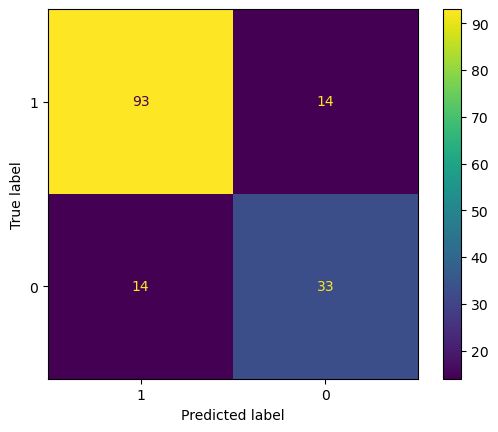

In [95]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=df.Outcome.unique())
disp.plot()

In [93]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [104]:
import joblib

# Enregistrer le modèle
joblib.dump(model, 'diabetes_model.pkl')

# Enregistrer aussi le scaler pour la normalisation
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']